# Week 9

## Notes

### NetworkX Library

In [1]:
import networkx as nx

In [2]:
G = nx.Graph()

In [3]:
G.add_nodes_from([1,2,3,4,5])

In [4]:
G.add_edges_from([(1,3),(1,4),(1,5),(2,3),(2,5),(3,4)])

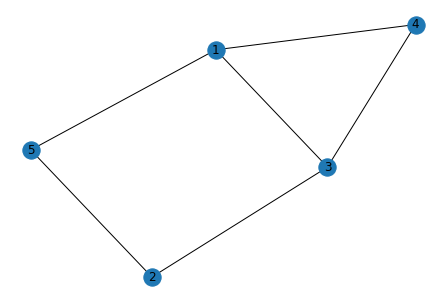

In [5]:
nx.draw(G,with_labels=True)

In [6]:
G.remove_node(3)

In [8]:
G.remove_edge(2,5)

In [9]:
G[1]

AtlasView({4: {}, 5: {}})

In [10]:
G.degree(1)

2

In [11]:
G.nodes()

NodeView((1, 2, 4, 5))

In [12]:
G.edges()

EdgeView([(1, 4), (1, 5)])

### Errors

Several of you were getting errors in class when trying to use `networkx` to draw networks.  If the error you are getting mentions "decorations", one solution that seemed to work was to run the command `pip install decorations==4`.

Other errors that showed up include `AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'`.  This seems to be a problem with incompatibility between the versions of `matplotlib` and `networkx` that you have on your computer.  Googling this error will give you many different answers included upgrades or downgradinng your versions of these two libraries.  For reference, the versions on my computer are:

In [13]:
import matplotlib
print(matplotlib.__version__)

3.1.3


In [14]:
print(nx.__version__)

2.4


Function with input $k$ and output the complete network on $k$ nodes.

In [15]:
def complete_network(k):
    G = nx.Graph()
    G.add_nodes_from([i for i in range(k)])
    G.add_edges_from([(i,j) for i in range(k) for j in range(i+1,k)])
    return G

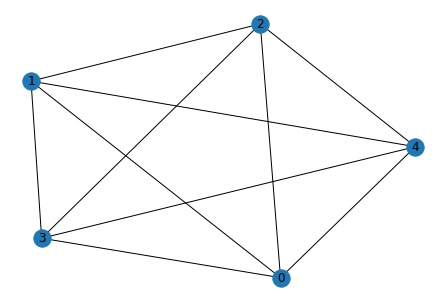

In [16]:
nx.draw(complete_network(5),with_labels=True)

Create a function with input $k $ whose output is a cycle on $ k $ nodes.

In [17]:
def cycle(k):
    G = nx.Graph()
    G.add_nodes_from([i for i in range(k)])
    G.add_edges_from([(i,i+1) for i in range(k-1)])
    G.add_edge(0,k-1)
    return G

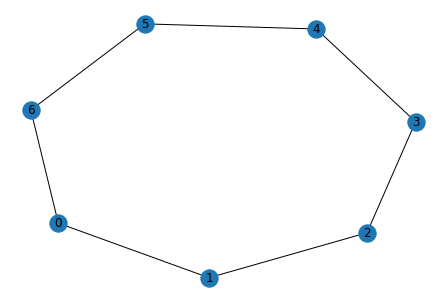

In [18]:
nx.draw(cycle(7),with_labels=True)

In [19]:
import random

Random graph with $k$ nodes and probability $ p $ of including an edge.

In [20]:
def random_graph(k,p):
    G = nx.Graph()
    G.add_nodes_from([i for i in range(k)])
    G.add_edges_from([(i,j) for i in range(k) for j in range(i+1,k) if random.random() < p])
    return G

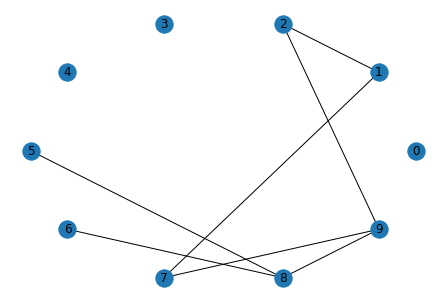

In [21]:
R = random_graph(10,0.2)
nx.draw(R, pos=nx.circular_layout(R), with_labels=True)

In [33]:
%matplotlib notebook

In [34]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [35]:
G = nx.Graph()
G.add_nodes_from([0,1,2,3,4,5,6,7,8,9])

<IPython.core.display.Javascript object>


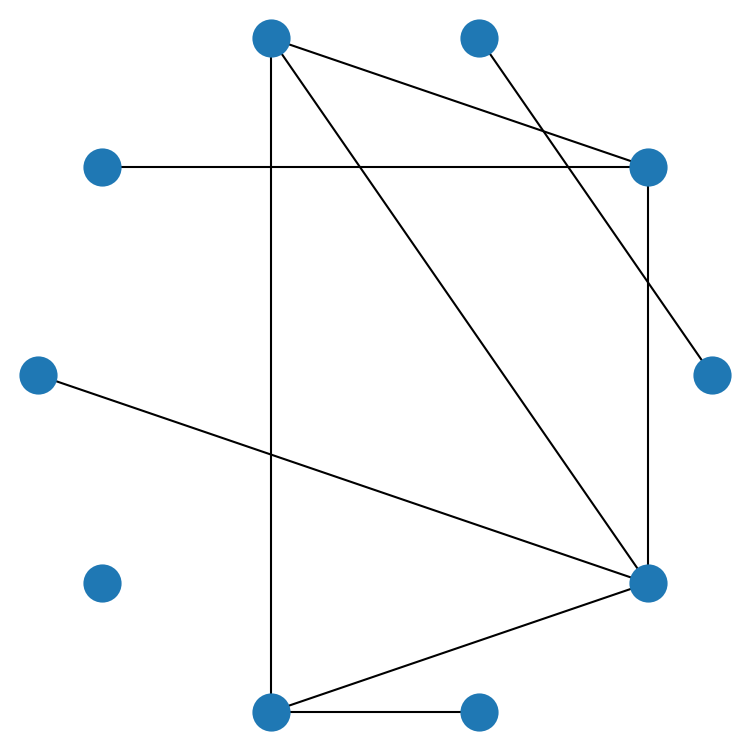

In [38]:
fig = plt.figure(figsize = (5,5))
nx.draw(G, pos=nx.circular_layout(G))

def animate(frame):
    fig.clear()
    edges_to_add = [(i,j) for i in range(10) for j in range(i+1,10) if random.random() < 0.2]
    edges_to_remove = G.edges()
    G.remove_edges_from(edges_to_remove)
    G.add_edges_from(edges_to_add)
    nx.draw(G, pos=nx.circular_layout(G))

anim = FuncAnimation(fig=fig, func=animate,  interval=1000, blit=True, repeat=False)
plt.show()